In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from reproject import reproject_interp
from astropy.visualization import make_lupton_rgb

In [2]:
class Image:
    
    def __init__(self, filename):
        self.filename = filename
        fts = fits.open(filename)
        self.hdu = fts[0]
        self.data = self.hdu.data.copy()
        self.header = self.hdu.header.copy()
        self.header.rename_keyword('RADECSYS','RADESYSa')
        self.wcs = WCS(self.header)
        fts.close()    
        
    def rgbscale(self, log=False, vmin=None, vmax=None):
    
        scaled = self.data.copy()
    
        scaled[~np.isfinite(scaled)] = 0
    
        if log:
            scaled = np.log10(scaled)
        if vmin is None:
            vmin = np.nanmin(scaled)
        else:
            scaled[scaled <= vmin] = vmin
        if vmax is None:
            vmax = np.nanmax(scaled)
        else:
            scaled[scaled >= vmax] = vmax  
        
        scaled = (scaled - vmin)/(vmax - vmin)
    
        scaled[scaled < 0] = 0.
        scaled[scaled > 1] = 1.
        
        return scaled

In [3]:
def rgbscale(a, log=False, vmin=None, vmax=None):
    
    scaled = a.copy()
    
    scaled[~np.isfinite(scaled)] = 0
    
    if log:
        scaled = np.log10(scaled)
    if vmin is None:
        vmin = np.nanmin(scaled)
    else:
        scaled[scaled <= vmin] = vmin
    if vmax is None:
        vmax = np.nanmax(scaled)
    else:
        scaled[scaled >= vmax] = vmax  
        
    scaled = (scaled - vmin)/(vmax - vmin)
    
    scaled[scaled < 0] = 0.
    scaled[scaled > 1] = 1.
        
    return scaled

In [4]:
#array, footprint = reproject_interp(hdu2, hdu1.header)
path = './'

In [5]:
B = Image(path+'NM20in-20200405-031953-M37-B.fts')
V = Image(path+'NM20in-20200405-040513-M37-V.fts')
R = Image(path+'NM20in-20200405-042428-M37-R.fts')

In [6]:
%%time
Vr, Vfoot = reproject_interp(V.hdu, B.header)
Rr, Rfoot = reproject_interp(R.hdu, B.header)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


CPU times: user 33.8 s, sys: 5.87 s, total: 39.7 s
Wall time: 39.9 s


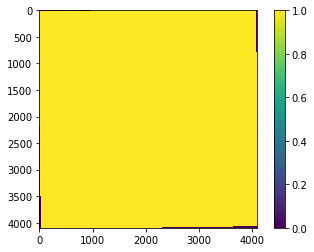

In [7]:
plt.imshow(Rfoot)
plt.colorbar()
plt.show()

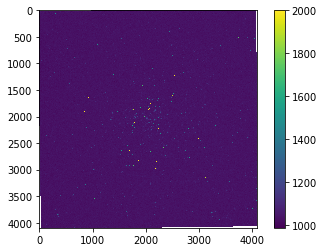

In [8]:
plt.imshow(Rr, vmax=2000)
plt.colorbar()
plt.show()

In [9]:
Blsc = rgbscale(B.data, log=True, vmin=3,vmax=3.4)
Vlsc = rgbscale(Vr, log=True, vmin=3,vmax=3.4)
Rlsc = rgbscale(Rr, log=True, vmin=3,vmax=3.4)

/Users/jaguirre/opt/anaconda3/envs/ASTR250/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


In [10]:
rgb = np.stack((Rlsc,Vlsc,Blsc), axis=2)

In [11]:
%matplotlib notebook
plt.figure(figsize=(10,10))
plt.subplot(projection = B.wcs)
plt.imshow(rgb)
plt.colorbar(shrink=0.8)
plt.show()

<IPython.core.display.Javascript object>

In [13]:
Bsc = rgbscale(B.data, log=False)#, vmin=3,vmax=3.4)
Vsc = rgbscale(Vr, log=False)#, vmin=3,vmax=3.4)
Rsc = rgbscale(Rr, log=False)#, vmin=3,vmax=3.4)
rgb2 = make_lupton_rgb(Rsc, Vsc, Bsc, stretch=0.5)

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(projection = B.wcs)
plt.imshow(rgb2)
plt.colorbar(shrink=0.8)
plt.show()

In [ ]:
make_lupton_rgb?